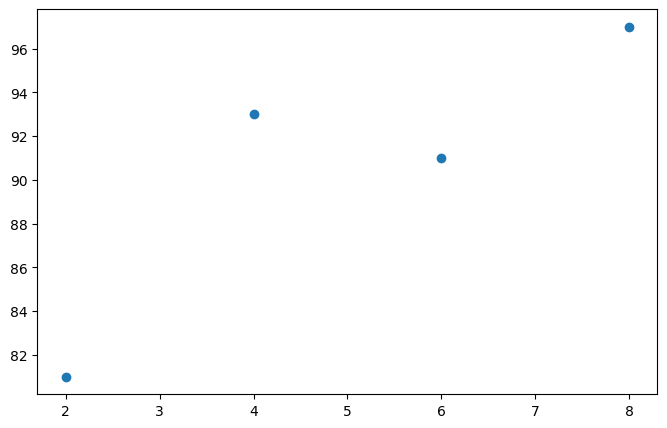

epoch=0, 기울기=0.0000, 절편=0.0000
LR:0.08000, a_diff:-464.00, b_diff:-90.50, MSE:8225.00000000
epoch=400, 기울기=2.5554, 절편=77.4756
LR:0.06000, a_diff:0.04, b_diff:-0.25, MSE:8.68733487
epoch=800, 기울기=2.3051, 절편=78.9695
LR:0.06000, a_diff:0.00, b_diff:-0.00, MSE:8.30015545
epoch=1200, 기울기=2.3001, 절편=78.9994
LR:0.06000, a_diff:0.00, b_diff:-0.00, MSE:8.30000006
epoch=1600, 기울기=2.3000, 절편=79.0000
LR:0.06000, a_diff:0.00, b_diff:-0.00, MSE:8.30000000
epoch=2000, 기울기=2.3000, 절편=79.0000
LR:0.06000, a_diff:0.00, b_diff:-0.00, MSE:8.30000000


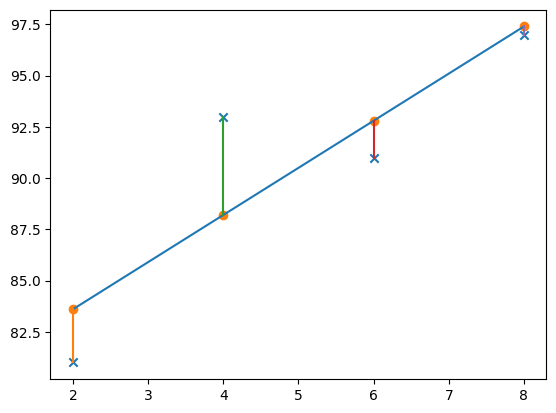

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = [[2, 81], [4, 93], [6, 91], [8, 97]]

x = [i[0] for i in data]
y = [i[1] for i in data]

plt.figure(figsize=(8, 5))
plt.scatter(x, y)
plt.show()

x_data = np.array(x)
y_data = np.array(y)

a = 0
b = 0

#lr = 0.08로 시작
lr = 0.08
epochs = 2001

def mse(y_hat, y):
  return ((y_hat - y) ** 2).mean()

def mse_val(predict_result, y):
  return mse(np.array(predict_result), np.array(y))

for i in range(epochs):

  y_pred = a * x_data + b
  error = y_data - y_pred

  MSE = mse_val(y_pred, y)

  a_diff = -(1/len(x_data)) * sum(x_data * (error))
  b_diff = -(1/len(x_data)) * sum(y_data - y_pred)

  #mse, a_diff, b_diff, lr 값 출력
  if i % 400 == 0:
    print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
    print("LR:%.05f, a_diff:%.02f, b_diff:%.02f, MSE:%.08f" % (lr, a_diff, b_diff, MSE))

  a = a - lr * a_diff
  b = b - lr * b_diff

  y_pred_1 = a * x_data + b
  MSE_NEW = mse_val(y_pred_1, y)

  #mse값 증가하면 lr 0.01감소
  if(round(MSE, 8) < round(MSE_NEW, 8)) :
    lr = lr - 0.01

y_pred = a * x_data + b
plt.scatter(x, y , marker='x')
plt.scatter(x, y_pred)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.plot([x,x], [y, y_pred])
plt.show()